<a href="https://colab.research.google.com/github/diegomaza2001/tennis_atp/blob/master/GrandSlamRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grand Slam Regression**


## **Description of Problem**

The primary focus of this project is to leverage tennis data from a database that consists of a collection of historical data from each major International Tennis Federation (ITF) tournament (most notably, prior Grand Slams) in order to provide a program that can determine the necessary statistics to win a Grand Slam match. We will be only working with ATP Data which is the men's professional tennis league. Given that there are a multitude of metrics available in Tennis and that outcomes are quite often predictable based on historical performance, analyzing such data will provide a compelling method for taking multiple prominent data points into account in order to construct a model that can project future results in a comprehensive and fairly accurate manner. 

## **Evaluation of Data Analysis and Proposed Solution**

The data sources that we selected consolidate historical data professional tennis match data from 1960 to 2020, offering a comprehensive collection of metrics available for our analysis. For our analysis we will be looking at match data from 2000-2019, however, it is possible for any user to adjust which years they would like to look at when calling the get_data method. The basis of this selection is determined by an underlying regression model which takes into account a collection of metrics including: the chance to win an upcoming Grand Slam match based on certain statistics, percentage of points won on 1st Serve, break points faced, aces hit, and double faults. Furthermore, we are confident that through taking each of these components into account, a sufficient analysis will be done to determine what aspects a professional player needs to focus on to increase his chance of winning a Grand Slam match. 

## **Proposed Solution Cont. Tidying the Data**

The data that we are working with does need some cleaning. To do so, we need to start by specifying that we only want to look at Grand Slam matches. Once we have the matches we want we need to create new statistics based on the ones we are given, for example percent of 1st serve points won. A tricky part aspect of this data is that each row accounts for one match, meaning statistics for two players are in one row. To fix this issue we will need to extract the data from each row that is specific to one of the players so that we can use all this data in our regression. All of these steps are demonstrated in our flow charts below. At the end we will also add some bar graphs to look for some interesting correlations between variables. Finally is the regression which is describes below.

**Database** = https://github.com/JeffSackmann/tennis_atp 

## **Regression Summary**

Goal: Run a regression on the factors bellow to see the impact of each one on the chance of winning a tennis match in a Grand Slam Tournament

First Serve Percentage: w_1stIn / w_svpt = fsp

Percent of First Serve Points Won: w_1stWon / w_svpt = p1stw

Percent of Second Serve Points Won: w_2ndWon / w_svpt = ps2ndw

Aces: w_ace = ace

Break Points Faced: w_bpFaced = bpFaced

Break Points Saved: w_bpSaved = bpSaved
 
Double Faults: w_df = df


**Control Flow Diagrams**





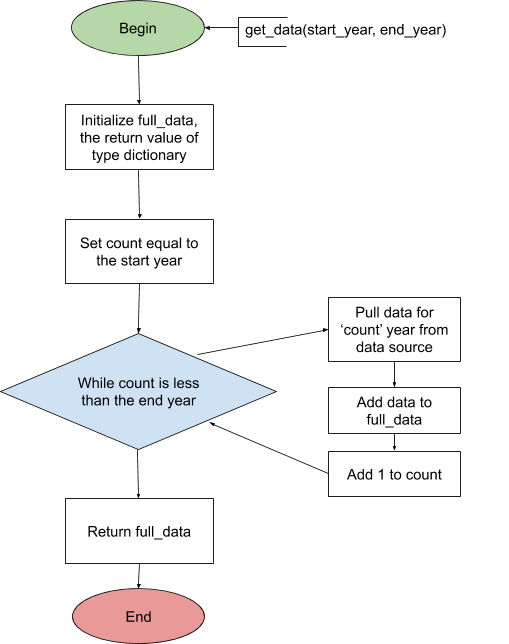

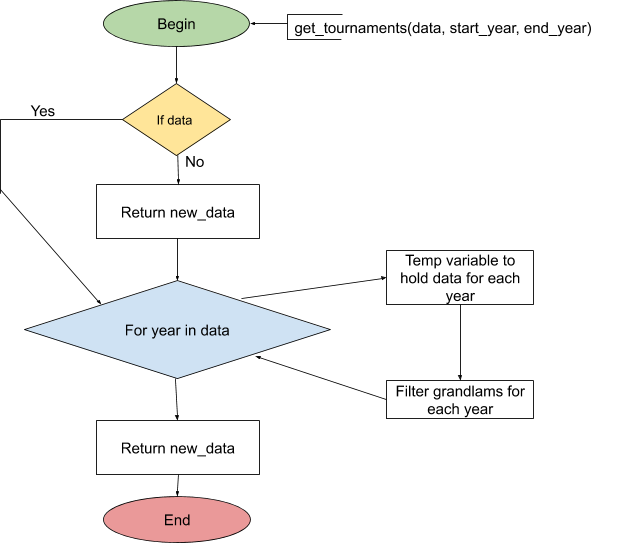

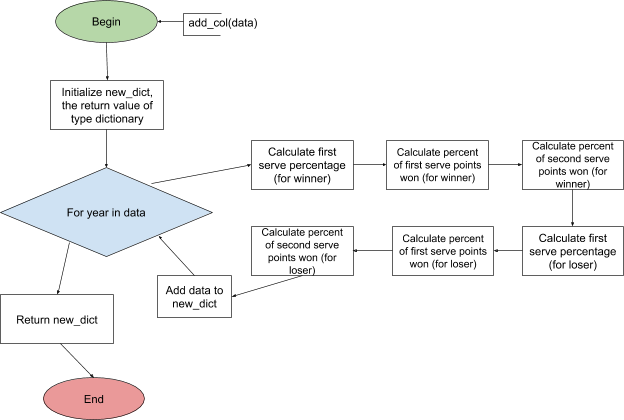

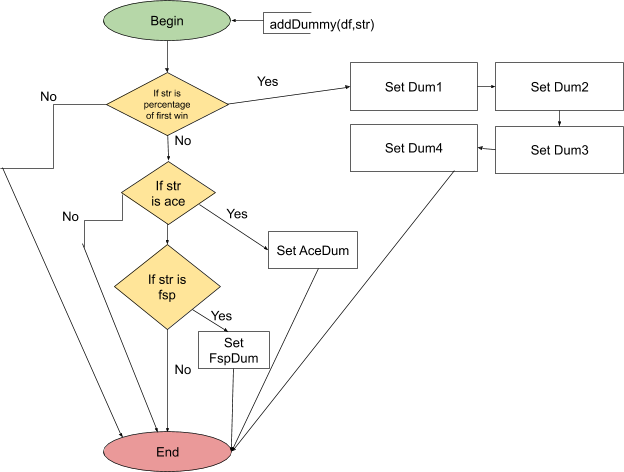

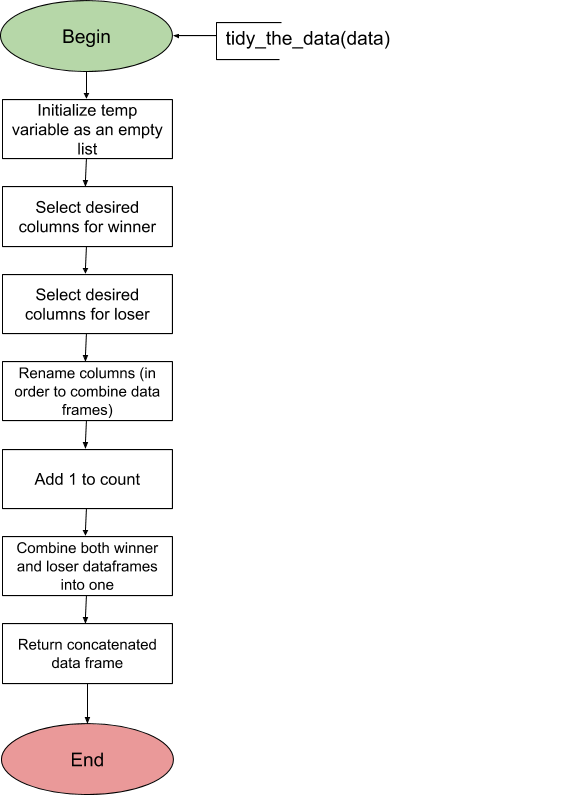

NOTE:

The 3 code blocks I did below might want to be something that we can automate, so that we can get all the data going back to the 1960s.

We need to figure out how we can make something that will go through each csv 
file from the github. It seems to me that would be the best way to go about it.

In [ ]:
# import pandas
import pandas as pd

# imports every data set we want
def get_data(start_year, end_year):
  full_data = {}
  count = start_year
  # imports data for each year we want
  while count <= end_year:
    url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_" + str(count) + ".csv"
    full_data["atp_" + str(count)] = pd.read_csv(url)
    count += 1
  return full_data

In [ ]:
# getting the data we want
data = get_data(2000, 2019)

In [ ]:
# function to get the tournaments we want
def get_tournaments(data=None, start_year=None, end_year=None):
  
  # if we are given the data pass if not then get the data
  if data:
    pass
  else:
    data = get_data(start_year, end_year)
  
  # new dictionary that will be returned
  new_data = {}

  # filters the data to only grandslams, if match is best of 5
  for year in data:
    # temporary variable to hold data for each year
    df = data[year]

    # filtering only grandslams for each year
    new_data[year] = df[df["tourney_name"].str.contains("Australian Open") |
                        df["tourney_name"].str.contains("Roland Garros") |
                        df["tourney_name"].str.contains("Wimbledon") |
                        df["tourney_name"].str.contains("US Open")]
  return new_data

In [ ]:
# calling get tournaments
filtered_data = get_tournaments(data)

In [ ]:
# function to add the new columns that contain new stats
def add_col(data):
  # variable to return new dict
  new_dict = {}

  for year in data:
    df = data[year]
    df["w_fsp"] = df["w_1stIn"] / df["w_svpt"]
    df["w_p1stw"] = df["w_1stWon"] / df["w_1stIn"]
    df["w_ps2ndw"] = df["w_2ndWon"] / (df["w_svpt"] - df["w_1stIn"] - df["w_df"])


    df["l_fsp"] = df["l_1stIn"] / df["l_svpt"]
    df["l_p1stw"] = df["l_1stWon"] / df["l_svpt"]
    df["l_ps2ndw"] = df["l_2ndWon"] / (df["l_svpt"] - df["w_1stIn"] - df["w_df"])

    # adding every df to the dictionary to return
    new_dict[year] = df

  


  return new_dict

In [ ]:
new = add_col(filtered_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
# concattinating all the dataframes from by big dictionary together
full_df = pd.concat(new.values())

In [ ]:
# importing numpy
import numpy as np

# Creates a dummy variable which allowing for certian sections of the model to have different coeffecients.
# The Dummy variable is either 1 if the data meets the criteria and is 0 if it doesn't. In this case if someone had a first serve percentage of 85% they would have a 1 for Dum1-4 and a 0 for Dum 5.
def addDummy(df, str):

  #creates a dummy variable for first serve percentage
  if str == "perc_1st_w":
    df["Dum1"] = np.where((df[str] >= 0.4), 1, 0) #Greater than 40%
    df["Dum2"] = np.where((df[str] >= 0.5), 1, 0) #Graater than 50%
    df["Dum3"] = np.where((df[str] >= 0.7), 1, 0) #Greater than 70%
    df["Dum4"] = np.where((df[str] >= 0.8), 1, 0) #Greater than 80%
    df["Dum5"] = np.where((df[str] >= 0.9), 1, 0) #Greater than 90%
  
  #creates a dummy for aces if the player has more than 17 in the match
  #the goal is to see if there is a difference in the effect an ace has on winning the match if a player has signifigantly higher aces than the average.
  if str == "ace":
    df["AceDum"] = np.where((df[str] >= 20), 1, 0)

  #creates a dummy for first serve percentage if it is greater than 70%
  if str == "fsp":
    df["FspDum"] = np.where((df[str] >= .70), 1, 0)



In [ ]:
# function to tidy the data so that it can all be combined together
def tidy_the_data(data):
  # temp variable
  temp = []

  # selecting the columns that we want
  w_df = full_df[["tourney_id", "tourney_name", "winner_seed", "winner_name", 
                  "winner_age", "w_ace", "w_df", "w_fsp", "w_p1stw", "w_ps2ndw",
                  "w_bpSaved", "w_bpFaced"]]

  # selecting the columns that we want
  l_df = full_df[["tourney_id", "tourney_name", "loser_seed", "loser_name", 
                  "loser_age", "l_ace", "l_df", "l_fsp", "l_p1stw", "l_ps2ndw",
                  "l_bpSaved", "l_bpFaced"]]

  # renaming the columns so that we can combine the dfs
  w_df.rename(columns = {"winner_seed" : "seed", "winner_name" : "name",
                         "winner_age" : "age", "w_ace" : "ace", "w_df": "df",
                         "w_fsp" : "fsp", "w_p1stw" : "perc_1st_w", 
                         "w_ps2ndw" : "perc_2nd_w", "w_bpSaved" : "bpSaved",
                         "w_bpFaced" : "bpFaced"}, inplace = True)
  # adding a result column
  w_df["result"] = 1
  addDummy(w_df, "perc_1st_w")
  addDummy(w_df, "ace")
  addDummy(w_df, "fsp")
  w_df["perc_bp_w"] = (w_df["bpSaved"] / w_df["bpFaced"])

  # renaming the columns so that we can combine the dfs
  l_df.rename(columns = {"loser_seed" : "seed", "loser_name" : "name",
                         "loser_age" : "age", "l_ace" : "ace", "l_df": "df",
                         "l_fsp" : "fsp", "l_p1stw" : "perc_1st_w", 
                         "l_ps2ndw" : "perc_2nd_w", "l_bpSaved" : "bpSaved",
                         "l_bpFaced" : "bpFaced"}, inplace = True)
  # adding a result column
  l_df["result"] = 0
  addDummy(l_df, "perc_1st_w")
  addDummy(l_df, "ace")
  addDummy(l_df, "fsp")
  l_df["perc_bp_w"] = (l_df["bpSaved"] / l_df["bpFaced"])

  # appending the two dfs to a list so that they can be concatinated
  temp.append(w_df)
  temp.append(l_df)

  return pd.concat(temp)


In [ ]:
# getting our final df
final_df = tidy_the_data(full_df)


# dropping any NA values
final_df.dropna()

In [ ]:
final_df = final_df[final_df["perc_2nd_w"] != 0]

final_df.dropna(subset=["perc_2nd_w"])

,tourney_id,tourney_name,seed,name,age,ace,df,fsp,perc_1st_w,perc_2nd_w,bpSaved,bpFaced,result,Dum1,Dum2,Dum3,Dum4,Dum5,AceDum,FspDum,perc_bp_w
2130,2000-520,Roland Garros,1.0,Andre Agassi,30.0,8.0,3.0,0.676768,0.731343,0.655172,2.0,4.0,1,1,1,1,0,0,0,0,0.500000
2131,2000-520,Roland Garros,NaN,Karol Kucera,26.0,11.0,4.0,0.603175,0.710526,0.619048,4.0,6.0,1,1,1,1,0,0,0,0,0.666667
2132,2000-520,Roland Garros,NaN,Jiri Vanek,22.0,9.0,5.0,0.580247,0.702128,0.539683,7.0,13.0,1,1,1,1,0,0,0,0,0.538462
2133,2000-520,Roland Garros,NaN,Franco Squillari,25.0,2.0,4.0,0.560000,0.660714,0.625000,4.0,7.0,1,1,1,0,0,0,0,0,0.571429
2134,2000-520,Roland Garros,NaN,Nicolas Massu,21.0,5.0,1.0,0.505618,0.666667,0.534884,6.0,9.0,1,1,1,0,0,0,0,0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,2019-560,US Open,13.0,Gael Monfils,33.0,10.0,17.0,0.604938,0.432099,0.426471,11.0,17.0,0,1,0,0,0,0,0,0,0.647059
2175,2019-560,US Open,20.0,Diego Schwartzman,27.0,4.0,3.0,0.602151,0.344086,0.485714,6.0,14.0,0,0,0,0,0,0,0,0,0.428571
2176,2019-560,US Open,NaN,Grigor Dimitrov,28.0,2.0,2.0,0.608247,0.381443,0.529412,4.0,9.0,0,0,0,0,0,0,0,0,0.444444
2177,2019-560,US Open,24.0,Matteo Berrettini,23.0,9.0,2.0,0.669492,0.440678,0.232877,12.0,16.0,0,1,0,0,0,0,0,0,0.750000


In [ ]:
final_df

,tourney_id,tourney_name,seed,name,age,ace,df,fsp,perc_1st_w,perc_2nd_w,bpSaved,bpFaced,result,Dum1,Dum2,Dum3,Dum4,Dum5,AceDum,FspDum,perc_bp_w
2130,2000-520,Roland Garros,1.0,Andre Agassi,30.0,8.0,3.0,0.676768,0.731343,0.655172,2.0,4.0,1,1,1,1,0,0,0,0,0.500000
2131,2000-520,Roland Garros,NaN,Karol Kucera,26.0,11.0,4.0,0.603175,0.710526,0.619048,4.0,6.0,1,1,1,1,0,0,0,0,0.666667
2132,2000-520,Roland Garros,NaN,Jiri Vanek,22.0,9.0,5.0,0.580247,0.702128,0.539683,7.0,13.0,1,1,1,1,0,0,0,0,0.538462
2133,2000-520,Roland Garros,NaN,Franco Squillari,25.0,2.0,4.0,0.560000,0.660714,0.625000,4.0,7.0,1,1,1,0,0,0,0,0,0.571429
2134,2000-520,Roland Garros,NaN,Nicolas Massu,21.0,5.0,1.0,0.505618,0.666667,0.534884,6.0,9.0,1,1,1,0,0,0,0,0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,2019-560,US Open,13.0,Gael Monfils,33.0,10.0,17.0,0.604938,0.432099,0.426471,11.0,17.0,0,1,0,0,0,0,0,0,0.647059
2175,2019-560,US Open,20.0,Diego Schwartzman,27.0,4.0,3.0,0.602151,0.344086,0.485714,6.0,14.0,0,0,0,0,0,0,0,0,0.428571
2176,2019-560,US Open,NaN,Grigor Dimitrov,28.0,2.0,2.0,0.608247,0.381443,0.529412,4.0,9.0,0,0,0,0,0,0,0,0,0.444444
2177,2019-560,US Open,24.0,Matteo Berrettini,23.0,9.0,2.0,0.669492,0.440678,0.232877,12.0,16.0,0,1,0,0,0,0,0,0,0.750000


In [ ]:
import statsmodels.formula.api as sm
import numpy as np 

#Do not run this top REG
def runReg(dataFrame):
  #Shows the effect of a change in first serve win percentage on chance of winning controlling for double faults, aces
  formula="result ~ np.log(perc_1st_w) + np.log(perc_1st_w) : Dum1 + np.log(perc_1st_w) : Dum2 + np.log(perc_1st_w) : Dum3 + np.log(perc_1st_w) : Dum4 + np.log(perc_1st_w) : Dum5 + bpFaced + ace + ace : AceDum + df +  np.log(fsp) +  FspDum : np.log(perc_1st_w)"
  results = sm.ols(formula, data=dataFrame).fit()
  print(results.summary())

def runReg1(dataFrame):
  formula="result ~ perc_1st_w + perc_1st_w : Dum1 + perc_1st_w : Dum2 + perc_1st_w : Dum3 + perc_1st_w : Dum4 + perc_1st_w : Dum5 + fsp + fsp : Dum2 + fsp : Dum3"
  results = sm.ols(formula, data=dataFrame).fit()
  print(results.summary())

#shows that first serve percentage is highly uncorelatred with result 
def fspReg(dataFrame):
  formula="result ~ fsp + fsp : AceDum"
  results = sm.ols(formula, data=dataFrame).fit()
  print(results.summary())

def runReg2(dataFrame):
  formula="result ~ perc_2nd_w"
  results = sm.ols(formula, data=dataFrame).fit()
  print(results.summary())

#runReg(final_df)
#runReg1(final_df)
runReg2(final_df)
#fspReg(final_df)

MissingDataError: ignored

Explanation of the regression above:


## **Graphs and Charts**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# rounding the ages of each player so that they can be grouped together 
# for nicer graphs
final_df["age"] = round(final_df["age"])

### Plotting Age vs. Ace

Text(0.5, 1.0, 'Age vs. Ace')

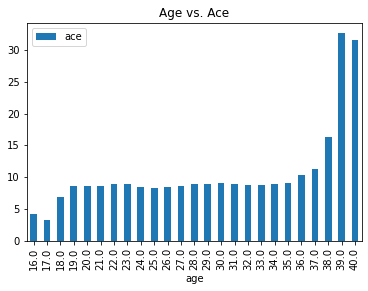

In [ ]:
# plotting age vs. ace for all the data
df1 = final_df[['age','ace']].dropna()
# grouping by age
df1 = df1[["age","ace"]].groupby(["age"]).mean()
df1.plot(kind = "bar")
plt.title('Age vs. Ace')

### Plotting Age vs. Ace for 2018

Text(0.5, 1.0, 'Age vs. Ace for 2018 Tournaments')

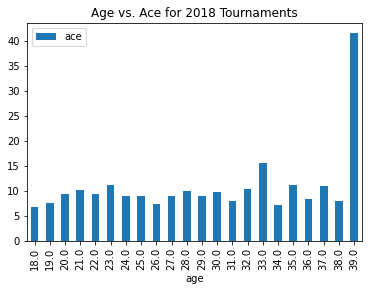

In [ ]:
# plotting age vs. ace for 2018 Tournaments
df1 = final_df[final_df["tourney_id"].str.contains("2018")]
df1 = df1[['age','ace']].dropna()
# grouping by age
df1 = df1[["age","ace"]].groupby(["age"]).mean()
df1.plot(kind = "bar")
plt.title('Age vs. Ace for 2018 Tournaments')

### Plotting Age vs. Match Wins for 2018

> Indented block




Text(0.5, 1.0, 'Age vs. Match Wins for 2018 Tournaments')

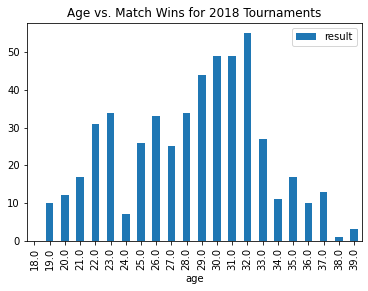

In [ ]:
# plotting age vs. match results for 2018 Tournaments
df1 = final_df[final_df["tourney_id"].str.contains("2018")]
df1 = df1[['age','result']].dropna()
# grouping by age
df1 = df1[["age","result"]].groupby(["age"]).sum()
df1.plot(kind = "bar")
plt.title('Age vs. Match Wins for 2018 Tournaments')

### Plotting Age vs. Match Wins for 2019


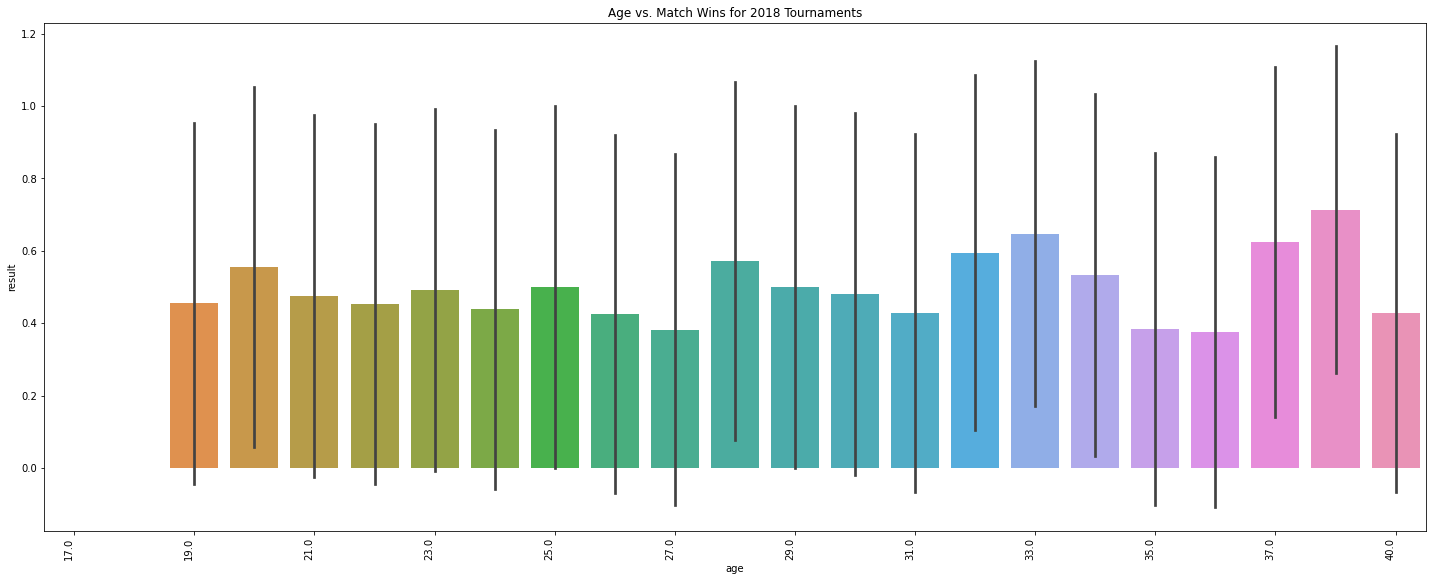

In [ ]:
# plotting age vs. match results for 2019 Tournaments
df1 = final_df[final_df["tourney_id"].str.contains("2019")]
df1 = df1[['age','result']].dropna().sort_values(['result'], ascending = False)
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,1,1)
ax = sns.barplot(x = 'age', y = 'result', data = df1, ci = 'sd')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
xticks = ax.xaxis.get_major_ticks()
plt.subplots_adjust(bottom=0.28)
for i in range(len(xticks)):
    if i % 2 == 1:
        xticks[i].set_visible(False)
plt.title('Age vs. Match Wins for 2018 Tournaments')
plt.show()